***
# <font color=navy size=9>Regressão Exponencial</font>
***

## Dados para regressão
Inicialmente iremos importar os dados para realizar a regressão exponencial.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados.csv')

Exibindo os 5 primeiros dados:

In [3]:
df.head()

,X,Y
0,0.0,144.0
1,0.2,120.0
2,0.4,128.0
3,0.6,116.0
4,0.8,100.0


Exibindo os 5 últimos dados:

In [4]:
df.tail()

,X,Y
46,9.2,5.34
47,9.4,4.00
48,9.6,8.63
49,9.8,4.40
50,10.0,4.01


Iremos plotar um gráfico de dispersão para verificar o comportamento dos dados.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0.98, 'Visualização dos Dados')

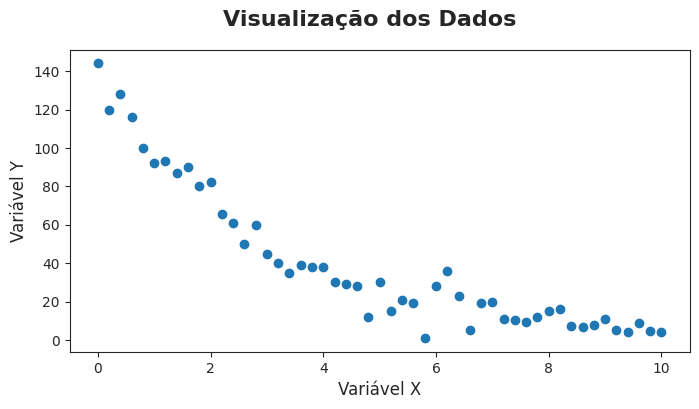

In [6]:
sns.set_style('ticks')
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(df['X'], df['Y'])
plt.xlabel('Variável X', size = 12)
plt.ylabel('Variável Y', size = 12)
plt.suptitle('Visualização dos Dados', fontweight='bold', size = 16)

Como se trata de regressão exponencial a equação utilizada é a seguinte:

##### $$\,Y = A\,e\,^{\small(BX)}$$
Aplicando $\ln()$ dos dois lados da equação:
##### $$\,\ln(Y) = \ln(A\,e\,^{\small(BX)})$$
Aplicando propriedades de logarítmo:
##### $$\,\ln(Y) =\ln(A) + (BX)\ln(e)$$
Como $\ln(e)=1$:
##### $$\,\ln(Y) =\ln(A) + BX$$

Então iremos realizar a regressão para $\ln(Y)$ e $X$.

Inicialmente iremos criar uma coluna de dados com $\ln(Y)$.

In [7]:
from math import log, e

In [8]:
df['lnY'] = df['Y'].apply(lambda x: log(x))

Para realizar a regressão é necessário definir as variáveis.

In [9]:
X = df['X'].values
Y = df['Y'].values
lnY = df['lnY'].values

Nesta etapa iremos realizar a regressão exponencial. O método usado é o de Mínimos Quadrados.

In [ ]:
import statsmodels.api as sm

In [11]:
X_reg = sm.add_constant(X)
model = sm.OLS(lnY, X_reg, missing = 'drop').fit()

Agora iremos salvar os resultados.

In [12]:
coefs = model.params
Y_pred = (e ** coefs[0]) * (e ** (coefs[1] * X))

Vamos visualizar os resultados em gráfico.

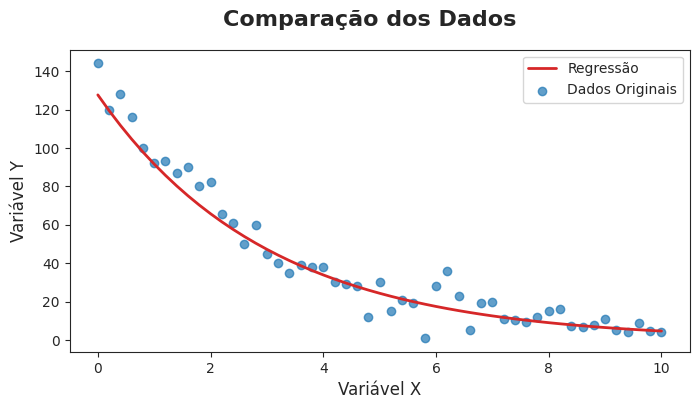

In [13]:
sns.set_style('ticks')
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(X, Y, alpha = 0.7, label = 'Dados Originais')
plt.plot(X, Y_pred, color = 'tab:red', linewidth = 2, label = 'Regressão');
plt.xlabel('Variável X', size = 12)
plt.ylabel('Variável Y', size = 12)
plt.suptitle('Comparação dos Dados', fontweight='bold', size = 16)
plt.legend()

## Métricas de erros
Vamos visualizar os resultados com algumas métricas de análise de erros.

### R2

O R-quadrado é uma medida de quão próximos os dados estão da linha de regressão ajustada.

* Valor "0" indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
* Valor "1" indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

In [14]:
from sklearn.metrics import r2_score
r_2 = r2_score(Y, Y_pred)
r_2

0.9571635258044966

### RMSE (Root Mean Squared Error)
O RMSE tem é a diferença média de um valor e o seu parâmetro inicial. É destinado a compreender erros de previsão.

In [15]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(Y,Y_pred))
rmse

7.7247875352206234

### MAE (Mean Absolute Error)
O MAE mede a magnitude média dos erros de previsões, sem considerar sua direção.

In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y,Y_pred)
mae

5.561450512970165

## Obtendo a equação da regressão
Como realizamos a regressão exponencial, iremos encontrar a seguinte equação:

##### $$\,Y = A\,e\,^{\small(BX)}$$


### Coeficientes

Os coeficientes podem ser adquiridos ao utilizar o método ".params" no resultado da regressão.

Anteriormente criei a variável "coefs" para guardar os coeficientes. 

Utilizei: "coefs = model.params"

> O valor de $\ln(A)$ é o "coefs[0]"

> O coeficiente B é o "coefs[1]"

Para encontrar o valor de A é necessário calcular: $e^{\ln(A)}$.

In [17]:
A = (e ** coefs[0]) # Coeficiente A
B = coefs[1] # Coeficiente B
print("Coeficiente A = {}\nCoeficiente B = {}".format(A, B))

Coeficiente A = 127.62529381304601
Coeficiente B = -0.331823528231464


Após definir os coeficientes, encontramos a seguinte equação:
> Lembre que o Python usa ponto no lugar de vírgula.

##### $$\,Y = (127.62)\,e\,^{\small(-0.33X)}$$

***